# Proyecto: El indice de marginalización de México

**Alumno**: Jesús Martín Gaytán Villarreal

In [1]:
# Importamos algunas liberias que utilizaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

%matplotlib inline

---
Comenzamos importando los datos que estaremos analisando desde el archivo .xls. Como se menciona, estos se encuentran en la hoja *IMM 2020*.

In [2]:
marginacion_df = pd.read_excel('./IMM_2020.xls',sheet_name='IMM_2020')

In [3]:
marginacion_df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


Al inspeccionar la dataframe generada, vemos que los nombres de cada columna son claves de los valores que en realidad representan. Esto puede generar problemas al momento de interpretar su valor. 

Para poder interpretarlos más facilmente, podemos utilizar el diccionario de datos disponible en la hoja "Diccionario" dentro del mismo archivo de Excel. Sin embargo, esta esta hoja incluye tambien un titulo en la primera fila, y la informacion que nos interesa abarca el rango A3:B20 (17 filas), por lo que debemos tomar esto en cuenta al momento de importar el diccionario.

In [4]:
data_dict = pd.read_excel('./IMM_2020.xls',sheet_name='Diccionario',skiprows=2,nrows=17,index_col=0)

Ahora que hemos importado el diccionario de datos como una dataframe, podemos mostrarlo dentro de nuestro cuaderno para mayor facilidad de consulta, en lugar de consultar repetidamente el archivo Excel.

Pero antes, ya que algunos variables tienen una descripcion muy extensa, debemos ajustar la candidad de caracteres mostrados en cada columna, para poder mostrar la descripcion completa

In [5]:
pd.options.display.max_colwidth = 100 

In [6]:
data_dict

,Descripción
Variable,
CVE_ENT,Clave de entidad federativa
NOM_ENT,Nombre de entidad federativa
CVE_MUN,Clave del municipio
NOM_MUN,Nombre del municipio
POB_TOT,Población total
ANALF,Porcentaje de población analfabeta de 15 años o más
SBASC,Porcentaje de población de 15 años o más sin educación básica
OVSDE,Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado
OVSEE,Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica


---
Ahora que ya tenemos disponibles tanto los datos como su diccionario, podemos procedes a explorar nuestro dataframe, comenzando por una descripción básica de sus estadísticas.

In [7]:
marginacion_df.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


Tan solo con una simple inspección de los datos anteriores, podemos observar algunos hallazgos interesantes en ella, por ejemplo:

* Existe al menos un municipio en el pais donde más de la mitad (53%) de la población mayor de 15 años es analfabeta.
* Exite al menos un minicipio en el pais donde casi el 90% de la población mayor de 15 años no cuenta con educación básica.
* En promedio, el 45% de la población mayor de 15 años por municipio no cuenta con educación básica.
* En la columna **PO2SM** podemos observar que en promedio, el 82% de la población ocupada por municipio en el país gana máximo 2 salarios mínimos. En 2023 este equivale a aproximadamente \\$ 207.44 pesos mexicanos al dia, o bien, \\$ 6,223.2 pesos mexicanos al mes.
* Por otro lado, podemos observar en la columna **OVSEE** que en promedio, solo en 1.5% de los ocupantes de viviendas por cada municipio en el país no cuentan con energia eléctrica. Sin embargo, existen municipios donde este porcentaje alcanza el 53%.
* También podemos observar que, en promedio, poco más de un cuarto (26%) de las viviendas en cada municipio se encuentran en hacinamiento, es decir, que su espacio fisico no se halla preparado para albergar a todos sus ocupantes.

---
Despues procedemos a crear una gráfica para comparar más facilmente el porcentaje de municipios en cada estado de acuerdo a su grado de marginación.

Para esto debemos hacer lo siguiente:
1. Reordenar nuestro dataframe, agrupando los valores por estado y por indicide de marginación.
1. Contar el número de municipios que hay por estado y por indice de marginación
1. Una vez contados, volver a agrupar los municipios por estado, pero esta vez para poder obtener su suma.
1. Dividir la cantidad de municipios por grado de marginación entre el total de municipios por estado.
1. Finalmente, graficar nuestro nuevo dataframe agrupado.

Comenzamos manipulando nuestro DataFrame para hacer las agrupaciones y operaciones necesarias.

In [8]:
grouped_df = marginacion_df.groupby(['NOM_ENT','GM_2020'])['NOM_MUN'].count() # Contamos el numero de municipios por entidad por Grado de Marginacion

# Agrupamos por el primer indice (estado) para despues dividir cada valor en el grupo entre la suma del grupo
grouped_df = grouped_df.groupby(level=0, group_keys=False).apply(lambda x:100 * x / float(x.sum())).to_frame().reset_index()

grouped_df.rename(columns={'NOM_MUN':'PORCENTAJE_MUN'},inplace=True) # Cambiamos el nombre de la columna para evitar confusiones
grouped_df

,NOM_ENT,GM_2020,PORCENTAJE_MUN
0,Aguascalientes,Muy bajo,100.000000
1,Baja California,Medio,16.666667
2,Baja California,Muy bajo,83.333333
3,Baja California Sur,Muy bajo,100.000000
4,Campeche,Alto,16.666667
...,...,...,...
118,Yucatán,Muy bajo,6.603774
119,Zacatecas,Alto,3.448276
120,Zacatecas,Bajo,48.275862
121,Zacatecas,Medio,8.620690


Después graficamos la información relevante utilizando matplotlib y seaborn. Seaborn es una libreria utilizada para crear gráficos estadisticos.

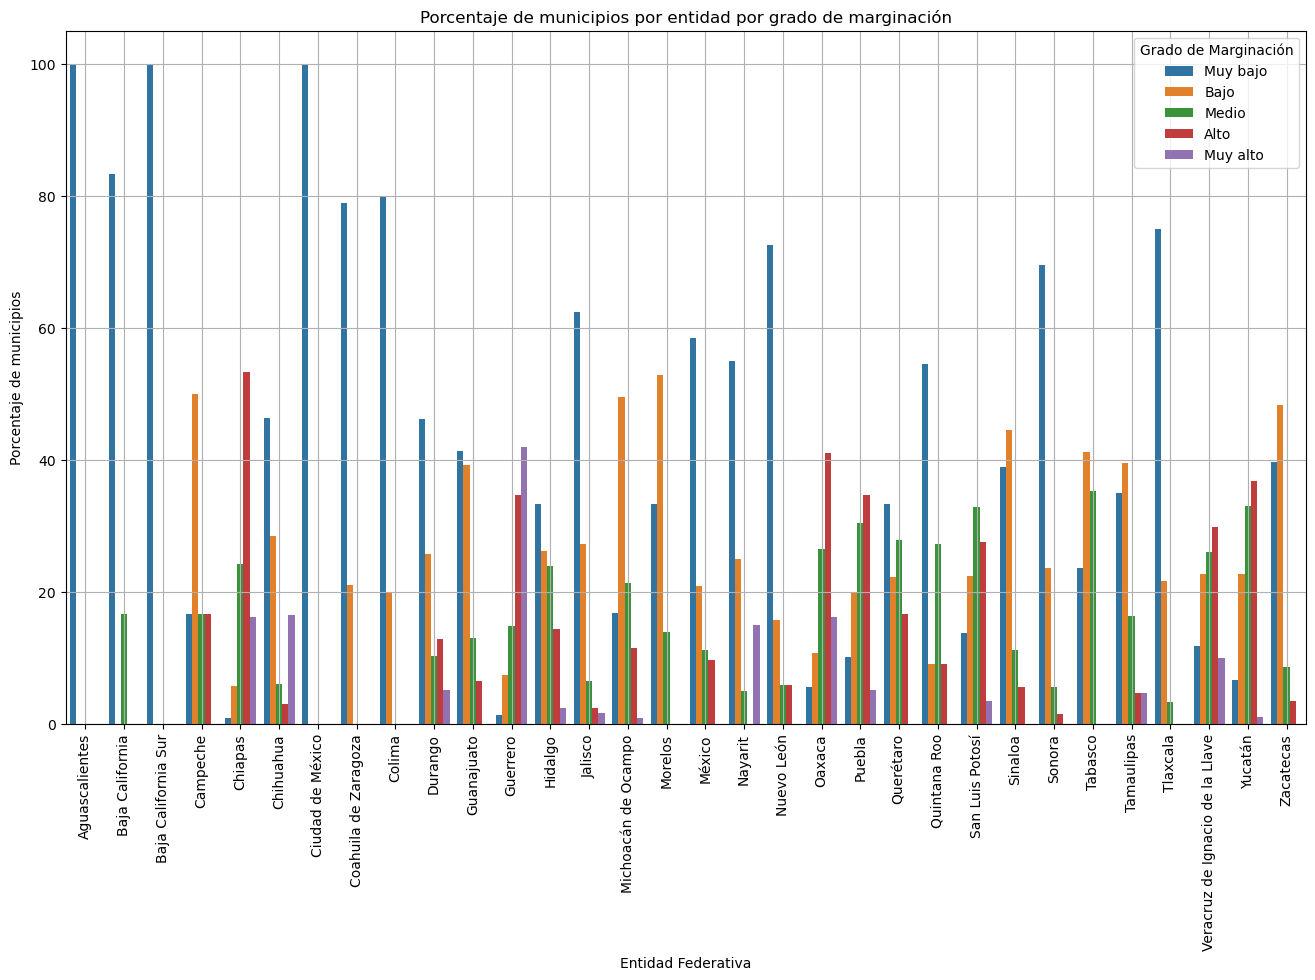

In [9]:
fig, ax = plt.subplots()

fig.set_size_inches(16,9)

# Generamos nuestro gráfico de barras
g = sns.barplot(
    x = 'NOM_ENT', 
    y = 'PORCENTAJE_MUN',
    hue = 'GM_2020',
    data = grouped_df,
    hue_order = ['Muy bajo','Bajo','Medio','Alto','Muy alto'],
    ax = ax)

# Agregamos información relevante y una cuadrícula para nuestro gráfico
ax.legend(title="Grado de Marginación")
ax.title.set_text('Porcentaje de municipios por entidad por grado de marginación')
ax.set_xlabel('Entidad Federativa')
ax.set_ylabel('Porcentaje de municipios')
ax.grid()

# Rotamos las etiquetas del eje x
plt.xticks(rotation=90)

# Guardamos nuestra figura al archivo municipios.png, el segundo argumento es para que no aparezca cortada.
fig.savefig(fname='img/municipios.png',bbox_inches='tight') 

plt.show()

Después procedemos a realizar un gráfico similar, pero esta vez graficando el porcentaje de **población** por estado segun su grado de marginacíon.

El procedimiento será similar al anterior, debemos hacer las manipulaciónes correspondientes a nuestro DataFrame antes de poder crear nuestro gráfico. La diferencia será que esta vez agruparemos por estado y grado de marginación, y después sumaremos la población total de cada estado.

In [10]:
# Agrupamos de nuevo por entidad y grade de marginación, pero esta vez sumamos los valores de la columna POB_TOT (población total por municipio)
grouped_df2 = marginacion_df.groupby(['NOM_ENT','GM_2020'])['POB_TOT'].sum()

# Volvemos a agrupar por estado, para ahora dividir el total de la población de cada uno entre su población total, y multiplicamos por 100
grouped_df2 = grouped_df2.groupby(level=0, group_keys=False).apply(lambda x:100 * x / float(x.sum())).to_frame().reset_index()

# Renombramos la columna para evitar confusiones
grouped_df2.rename(columns={'POB_TOT':'PORCENTAJE_POB'},inplace=True)

# Mostramos nuestro nuevo DataFrame
grouped_df2

,NOM_ENT,GM_2020,PORCENTAJE_POB
0,Aguascalientes,Muy bajo,100.000000
1,Baja California,Medio,3.119325
2,Baja California,Muy bajo,96.880675
3,Baja California Sur,Muy bajo,100.000000
4,Campeche,Alto,8.469424
...,...,...,...
118,Yucatán,Muy bajo,56.687498
119,Zacatecas,Alto,0.429926
120,Zacatecas,Bajo,21.386836
121,Zacatecas,Medio,6.305505


Una vez agrupado nuestro DataFrame, procedemos a generar un gráfico similar al anterior, solo que esta vez graficaremos el porcentaje de la población en vez del de los municipios.

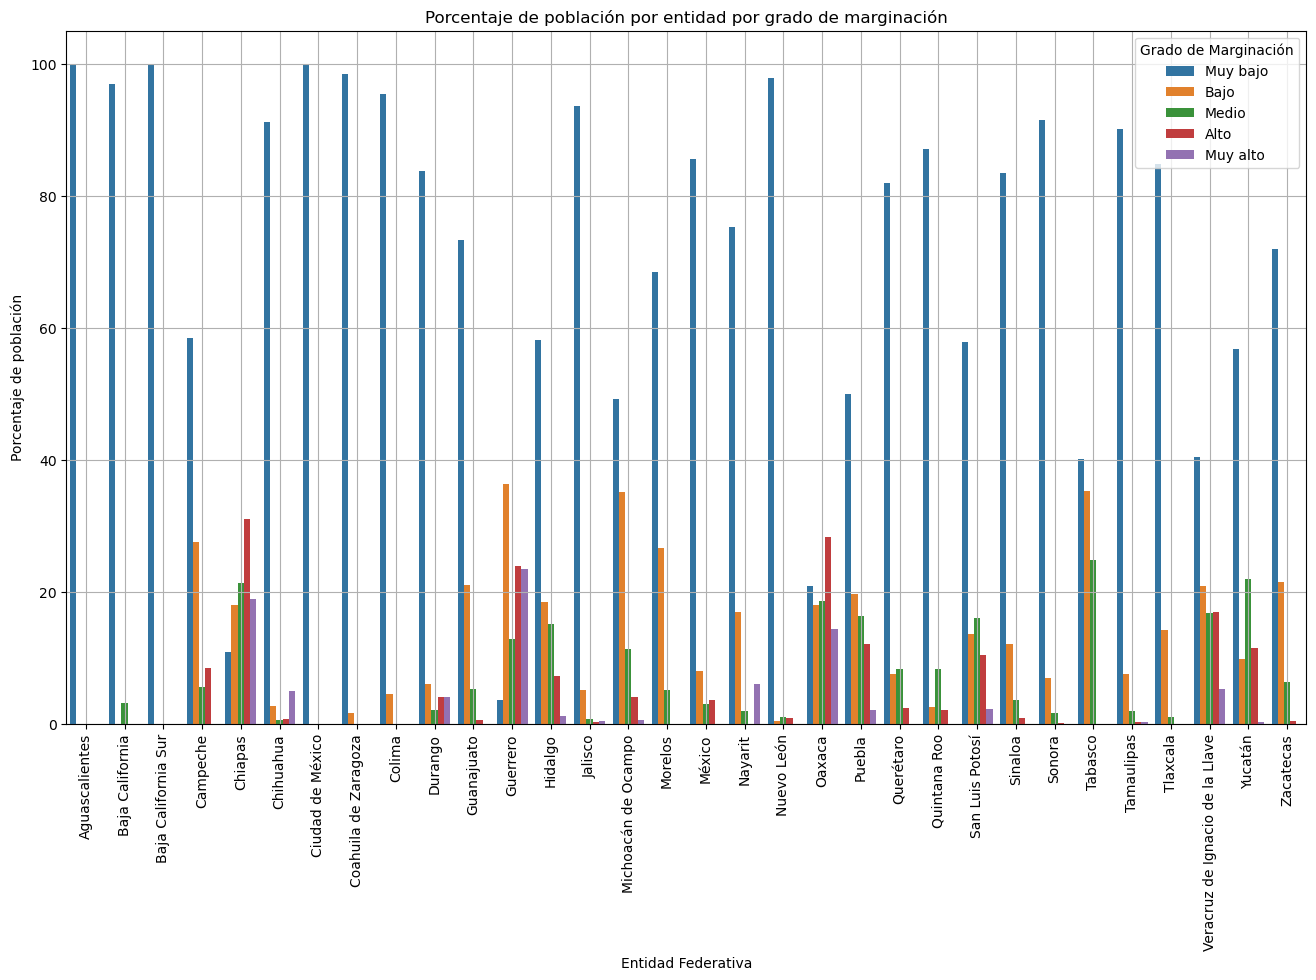

In [11]:
fig2, ax2 = plt.subplots()

fig2.set_size_inches(16,9)

# Generamos nuestro gráfico de barras
g2 = sns.barplot(
    x = 'NOM_ENT', 
    y = 'PORCENTAJE_POB',
    hue = 'GM_2020',
    data = grouped_df2,
    hue_order = ['Muy bajo','Bajo','Medio','Alto','Muy alto'],
    ax = ax2)

# Agregamos información relevante y una cuadrícula para nuestro gráfico
ax2.legend(title="Grado de Marginación")
ax2.title.set_text('Porcentaje de población por entidad por grado de marginación')
ax2.set_xlabel('Entidad Federativa')
ax2.set_ylabel('Porcentaje de población')
ax2.grid()

# Rotamos las etiquetas del eje x
plt.xticks(rotation=90)

# Guardamos nuestra figura al archivo municipios.png, el segundo argumento es para que no aparezca cortada.
fig2.savefig(fname='img/poblacion.png',bbox_inches='tight') 

# Covnertimos nuestro archivo .png en un archivo .jpeg
Image.open('img/poblacion.png').convert('RGB').save('img/poblacion.jpg','JPEG')

plt.show()

Al comparar esta nueva gráfica con la anterior, podemos observar una tendencia importante: en la mayoría de los estados, con algunas excepciones, *la población se concentra principalmente en una minoría de municipios de muy baja marginación.*

Esta proporción no concuerda con el porcentaje de municipios por grado de marginación en cada estado.
* Un claro ejemplo de esto es **Chihuahua**, que a pesar de contar con un 50% de municipios con muy baja marginación, alrededor del 90% de su población vive en este nivel de marginación. Dicho de otra forma: *el 50% de los municipios del estado, los cuales cuentan con un nivel muy bajo de marginación, alberga al 90% de la población del estado.*

* Otro ejemplo de esta tendencia es **Puebla**, donde tan solo el 10% de municipios, los cuales cuentan con un nivel muy bajo de marginación, alberga al 50% de los poblanos.

* Por último podemos observar como en **Yucatán** el 60% de la población se concentra en el 5% de los municipios del estado, los cuales son considerados como de muy baja marginación.

* Sin embargo, en los estados tipicamente considerados como los más marginados del país, esta tendencia se rompe. Un ejemplo de esto es **Chiapas**, donde la tercera parte de la población se distribuye en la mitad (~50%) de los municipios de este estado, los cuales tienen un nivel alto de marginación. Una tendencia similar se puede apreciar en **Oaxaca** y **Guerrero**.

---
Siguiendo adelante con otras estadísticas, nos podemos preguntar si existe alguna relación entre ellas. Por ejemplo, ¿existe alguna relación entre el porcentaje de población analfabeta en un municipio, con el porcentaje de personas que viven en localidades pequeñas (con población menor a 5000 habitantes)?

Para resolver esta duda, podemos crear un gráfico donde expresemos uno de estos valores en función del otro. Para esto, podemos utilizar de nuevo la libreria Seaborn, la cual ofrece una función para generar un diagrama de dispersión, y además agregarle una línea de tendencia, como se muestra a continuación.

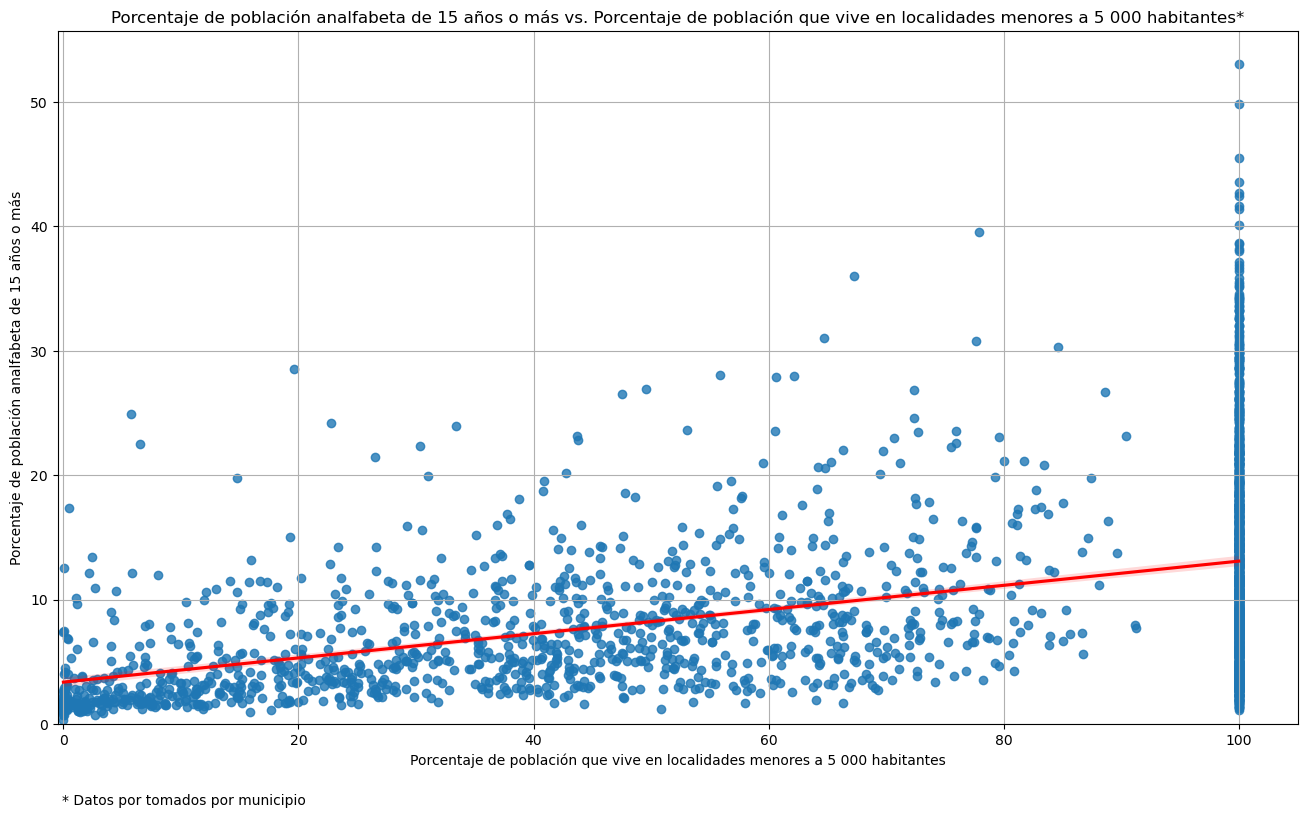

In [12]:
fig3, ax3 = plt.subplots()

fig3.set_size_inches(16,9)

# Generamos nuestro de dispersion, agregando una linea de tendencia roja
g3 = sns.regplot(
    x = 'PL.5000', 
    y = 'ANALF',
    data = marginacion_df,
    ax = ax3,
    line_kws = {'color':'red'})

# Agregamos información relevante y una cuadrícula para nuestro gráfico
ax3.title.set_text(f"{data_dict.loc['ANALF'].item()} vs. {data_dict.loc['PL.5000'].item()}*")
ax3.set_ylabel(f"{data_dict.loc['ANALF'].item()}")
ax3.set_xlabel(f"{data_dict.loc['PL.5000'].item()}")

ax3.set_ylim(0)
ax3.set_xlim(-0.5)

ax3.grid()

plt.figtext(0.28, 0.02,'* Datos por tomados por municipio',horizontalalignment='right')
plt.show()

De la gráfica anterior podemos observar que la relación entre estas dos variables es muy debil, ya que la línea se muestra un poco horizonal, y los puntos se encuentran bastante dispersos en el gráfico. Además, podemos observar una línea vertical de puntos a la derecha del gráfico, esto posiblemente debido a que en municipios muy poco poblados, el porcentaje de población que vive en localidades de menos de 5000 es prácticamente el 100%. 

Pero entonces, si el porcentaje de población analfabeta no se relaciona con el tamaño de las localidades, ¿con qué sí lo hace? Para responder esta pregunta podemos generar lo que se conoce como una *matriz de correlación*, la cual nos muestra el coeficiente de correlación que existe entre las variables de nuestro dataset.

In [13]:
# Generamos un mapa de colores para mayor facilidad de lectura
cmap = sns.diverging_palette(5, 250, as_cmap=True)

# Utilizamos el metodo .corr de nuestro dataframe, sin tomar en cuenta las dos primeras columnas, ya que no son relevantes
corr = marginacion_df.drop(['CVE_ENT','CVE_MUN'],axis = 'columns').corr(numeric_only = True)
(corr.style.background_gradient(cmap, axis=1)
    .format(precision=3)) # agregamos un poco de estilo y formato a nuestra matriz e imprimimos

,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
POB_TOT,1.000,-0.237,-0.387,-0.111,-0.105,-0.092,-0.162,-0.206,-0.423,-0.411,0.315,0.315
ANALF,-0.237,1.000,0.779,0.348,0.352,0.361,0.645,0.659,0.449,0.620,-0.848,-0.848
SBASC,-0.387,0.779,1.000,0.259,0.297,0.270,0.548,0.521,0.599,0.702,-0.769,-0.769
OVSDE,-0.111,0.348,0.259,1.000,0.530,0.219,0.279,0.374,0.205,0.204,-0.566,-0.566
OVSEE,-0.105,0.352,0.297,0.530,1.000,0.344,0.501,0.308,0.231,0.198,-0.637,-0.637
OVSAE,-0.092,0.361,0.270,0.219,0.344,1.000,0.391,0.320,0.190,0.276,-0.582,-0.582
OVPT,-0.162,0.645,0.548,0.279,0.501,0.391,1.000,0.615,0.339,0.478,-0.772,-0.772
VHAC,-0.206,0.659,0.521,0.374,0.308,0.320,0.615,1.000,0.269,0.581,-0.731,-0.731
PL.5000,-0.423,0.449,0.599,0.205,0.231,0.190,0.339,0.269,1.000,0.575,-0.587,-0.587
PO2SM,-0.411,0.620,0.702,0.204,0.198,0.276,0.478,0.581,0.575,1.000,-0.699,-0.699


En la matriz anterior, podemos observar el coeficiente de correlación entre diversos pares de variables de nuestro dataset. En el caso de nuestra variable de interés (*ANALF*), está mas fuertemente relacionada con cuatro variables:
* El porcentaje de personas mayores de 15 años in eduación básica (*SBASC*)
* El porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra (*OVPT*)
* El porcentaje de viviendas particulares con hacinamiento (*VHAC*)
* El Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos (*PO2SM*)

Si bien la primer variable puede parecer como la mas evidentemente relacionada, las demás también son factores que pueden afectar directa e indirectamente la educación de los habitantes.

Podemos tomar la variable con la correlación más fuerte (*SBASC*) para comparar el comportamiente de ambas variables en relación con el gráfico anterior. Para ello podemos repetir el proceso que seguimos para generar un nuevo gráfico de dispersión.

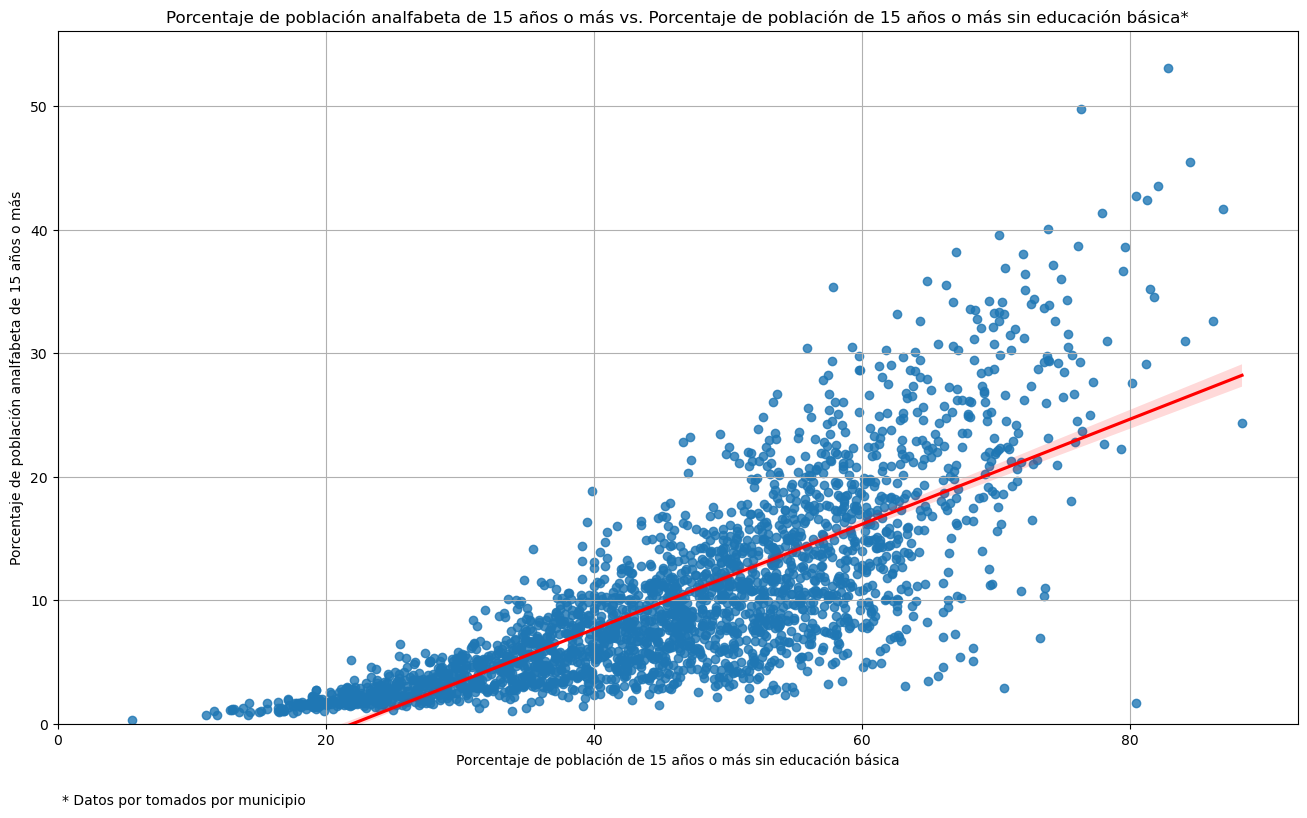

In [14]:
fig4, ax4 = plt.subplots()

fig4.set_size_inches(16,9)

# Generamos nuestro de dispersion, agregando una linea de tendencia roja
g4 = sns.regplot(
    x = 'SBASC', 
    y = 'ANALF',
    data = marginacion_df,
    ax = ax4,
    line_kws = {'color':'red'})

# Agregamos información relevante y una cuadrícula para nuestro gráfico
ax4.title.set_text(f"{data_dict.loc['ANALF'].item()} vs. {data_dict.loc['SBASC'].item()}*")
ax4.set_ylabel(f"{data_dict.loc['ANALF'].item()}")
ax4.set_xlabel(f"{data_dict.loc['SBASC'].item()}")

ax4.set_ylim(0)
ax4.set_xlim(0)

ax4.grid()

plt.figtext(0.28, 0.02,'* Datos por tomados por municipio',horizontalalignment='right')
plt.show()

Comparando con el gráfico anterior, en éste podemos observar una relación más fuerte entre ambas variables. Si bien correlación no significa causalidad, en este gráfico podemos observar que al aumentar el porcentaje de población sin educación básica, el porcentaje de personas analfabetas en el municipio tiende a aumentar de igual forma.

---

Para finalizar, ¿podríamos generar nuevos indicadores para los estados a partir de los indicadores municipales? Volvamos a dar un vistazo a las estadisticas de nuesto dataset para tratar de identificar indicadores críticos.

In [15]:
marginacion_df.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


En el resumen de nuestro dataset, podemos observar algunos indicadores que presentan promedios por municipios considerablemente elevados, que en mi opinión podrían ser considerados como críticos. Estos indicadores son:
* **Porcentaje de población analfabeta de 15 años o más (ANALF)**: el promedio nacional por municipio es de aproximadamente 10%, esto me parece crítico, ya que esto representa una décima parte de la población de cada municipio.

* **Porcentaje de población de 15 años o más sin educación básica (SBASC)**: Este indicador está relacionado con el anterior, sin embargo el promedio por municipio de éste alcanza casi un 45%, llegando a tomar valores máximos de casi 90%. Tanto este indicador como el anterior pueden aprovecharse para el diseño e implementación de políticas o programas públicos de educación para población joven-adulta.

* **Porcentaje de viviendas particulares con hacinamiento (VHAC)**: El promedio por municipio de este indicador indica que casi un cuarto de las viviendas en cada municipio del país no tienen el espacio suficiente para albergar a sus ocupantes. Este indicador puede ser aprovechado para las políticas públicas referentes a la vivienda.

* **Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos (PO2SM)**: En 2020, el Coneval indicó que la pobreza por ingresos estaba en \\$2086.57 pesos mexicanos para zonas rurales, y \\$3202.64 pesos mexicanos para zonas urbanas por integrante del hogar ([fuente](https://www.coneval.org.mx/Medicion/Documents/Lineas_bienestar/Lineas_de_pobreza_COVID_19_junio_2020.pdf)). Sin embargo, este indicador toma en cuenta a cualquier persona que gane menos de 2 salarios minimos, por lo una familia de 4 o 5 integrantes que se encuentre en este indicador puede encontrarse por debajo de la línea de pobreza, incluso en algunos casos llegando a la línea de pobreza extrema.

Por esto, considero estos indicadores como críticos, y por lo que propongo como indicadores para cada estado, el porcentaje de municipios que rebasan el valor de la media nacional. Veamos como se distribuyen estos porcentajes en el país.

Para esto, debemos generar un nuevo dataframe, que compare los valores de estos indicadores para cada municipio, contra la media nacional. Lo primero para lograr esto es obtener la media nacional por municipio de cada uno de estos indicadores.

In [16]:
dict_prom = {}
for column in ['ANALF','SBASC','VHAC','PO2SM']:
    dict_prom[column] = marginacion_df[column].mean()
    
print(dict_prom)

{'ANALF': 10.164466407399573, 'SBASC': 45.853025559253766, 'VHAC': 26.56628609099529, 'PO2SM': 82.1438538120169}


Una vez obtenidos estos valores, generamos una copia de nuestro DataFrame principal, y tomamos solo los indicadores relevantes, que son los anteriormente mencionados.

In [17]:
new_df = marginacion_df.copy()

In [18]:
new_df = new_df[['NOM_ENT','NOM_MUN','ANALF','SBASC','VHAC','PO2SM']]
new_df

,NOM_ENT,NOM_MUN,ANALF,SBASC,VHAC,PO2SM
0,Aguascalientes,Aguascalientes,1.644738,20.367220,10.339530,54.226594
1,Aguascalientes,Asientos,3.526405,33.906364,22.942305,78.565471
2,Aguascalientes,Calvillo,4.491509,42.482450,19.219858,79.259777
3,Aguascalientes,Cosío,3.144867,27.696745,22.716866,81.726369
4,Aguascalientes,Jesús María,2.380588,26.692477,16.404575,56.748753
...,...,...,...,...,...,...
2464,Zacatecas,Villa Hidalgo,7.497894,36.678176,21.932484,90.877128
2465,Zacatecas,Villanueva,4.199744,44.806459,15.269627,81.912592
2466,Zacatecas,Zacatecas,1.442438,19.436229,9.340958,57.885307
2467,Zacatecas,Trancoso,5.119108,31.992586,23.544577,83.056133


Una vez generado nuestro nuevo dataframe, podemos generar una columna para mostrar si el los indicadores de cada municipio se encuentran por encima de la media nacional, que almacenamos anteriormente en un diccionario. También podemos remover las columnas de estos indicadores, ya que no nos servirán para los próximos pasos.

In [19]:
for columna in ['ANALF','SBASC','VHAC','PO2SM']:
    new_df[f"{columna}_MEDNAC"] = new_df[columna] > dict_prom[columna]
    new_df.drop(columns = columna,inplace = True)

new_df

,NOM_ENT,NOM_MUN,ANALF_MEDNAC,SBASC_MEDNAC,VHAC_MEDNAC,PO2SM_MEDNAC
0,Aguascalientes,Aguascalientes,False,False,False,False
1,Aguascalientes,Asientos,False,False,False,False
2,Aguascalientes,Calvillo,False,False,False,False
3,Aguascalientes,Cosío,False,False,False,False
4,Aguascalientes,Jesús María,False,False,False,False
...,...,...,...,...,...,...
2464,Zacatecas,Villa Hidalgo,False,False,False,True
2465,Zacatecas,Villanueva,False,False,False,False
2466,Zacatecas,Zacatecas,False,False,False,False
2467,Zacatecas,Trancoso,False,False,False,True


Una vez generadas nuestras nuevas columnas, procedemos a agrupar nuestro DataFrame por estado, para despues obtener el *promedio* de cada columna. 

Cabe mencionar que en python, el valor booleano ```True``` tiene un valor numérico de 1, mientras que ```False``` tiene un valor equivalente de 0. Por esto, al obtener el promedio de una columna de valores booleanos, en realidad estamos obteniendo la proporcion de filas donde se cumple la condicion (en este caso, donde los indicadores municipales son mayores a la media nacional por municipio), y multiplicado este valor por 100, obtenemos el porcentaje.

In [20]:
new_df_grouped = new_df.groupby('NOM_ENT').mean(numeric_only=True) * 100
new_df_grouped

,ANALF_MEDNAC,SBASC_MEDNAC,VHAC_MEDNAC,PO2SM_MEDNAC
NOM_ENT,,,,
Aguascalientes,0.000000,0.000000,0.000000,0.000000
Baja California,0.000000,16.666667,16.666667,0.000000
Baja California Sur,0.000000,0.000000,0.000000,0.000000
Campeche,16.666667,0.000000,91.666667,41.666667
Chiapas,85.483871,74.193548,97.580645,91.935484
Chihuahua,17.910448,62.686567,16.417910,23.880597
Ciudad de México,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,0.000000,5.263158,0.000000,15.789474
Colima,0.000000,10.000000,0.000000,10.000000


Asi, generamos una nueva DataFrame,esta vez por estado, donde los indicadores están definidos como:

In [21]:
new_df_dict = {
    'ANALF_MEDNAC':'Porcentaje de municipios con indicador ANALF por encima de la media nacional',
    'SBASC_MEDNAC':'Porcentaje de municipios con indicador SBASC por encima de la media nacional',
    'VHAC_MEDNAC': 'Porcentaje de municipios con indicador VHAC por encima de la media nacional',
    'PO2SM_MEDNAC': 'Porcentaje de municipios con indicador VHAC por encima de la media nacional'    
}

new_data_dict = pd.DataFrame.from_dict(new_df_dict,orient='index',columns=['Descripcion'])
new_data_dict.index.name = 'Variable'
new_data_dict

,Descripcion
Variable,
ANALF_MEDNAC,Porcentaje de municipios con indicador ANALF por encima de la media nacional
SBASC_MEDNAC,Porcentaje de municipios con indicador SBASC por encima de la media nacional
VHAC_MEDNAC,Porcentaje de municipios con indicador VHAC por encima de la media nacional
PO2SM_MEDNAC,Porcentaje de municipios con indicador VHAC por encima de la media nacional


Así, podemos proceder a generar un gráfico similar a los dos primeros, pero ahora comparando el porcentaje de municipios por estado cuyos indicadores se encuentran por encima de la media. 

Pera esto debemos manipular un poco nuestro DataFrame antes de poder generar dicho gráfico. Los pasos a seguir para esto son:
1. Reiniciar los índices de nuestro DataFrame, esto para poder utilizarlos más facilmente como valores del eje x.
2. Transformar nuestro DataFrame de tal forma que podamos distinguir los valores graficados segun el indicador.
3. Finalmente, generamos el gráfico deseado.

In [22]:
# Paso 1
new_df_grouped.reset_index(inplace=True)
new_df_grouped

,NOM_ENT,ANALF_MEDNAC,SBASC_MEDNAC,VHAC_MEDNAC,PO2SM_MEDNAC
0,Aguascalientes,0.000000,0.000000,0.000000,0.000000
1,Baja California,0.000000,16.666667,16.666667,0.000000
2,Baja California Sur,0.000000,0.000000,0.000000,0.000000
3,Campeche,16.666667,0.000000,91.666667,41.666667
4,Chiapas,85.483871,74.193548,97.580645,91.935484
5,Chihuahua,17.910448,62.686567,16.417910,23.880597
6,Ciudad de México,0.000000,0.000000,0.000000,0.000000
7,Coahuila de Zaragoza,0.000000,5.263158,0.000000,15.789474
8,Colima,0.000000,10.000000,0.000000,10.000000
9,Durango,5.128205,30.769231,12.820513,43.589744


In [23]:
# Paso 2
melted_df = pd.melt(new_df_grouped,id_vars = 'NOM_ENT',value_vars=['ANALF_MEDNAC','SBASC_MEDNAC','VHAC_MEDNAC','PO2SM_MEDNAC'])
melted_df

,NOM_ENT,variable,value
0,Aguascalientes,ANALF_MEDNAC,0.000000
1,Baja California,ANALF_MEDNAC,0.000000
2,Baja California Sur,ANALF_MEDNAC,0.000000
3,Campeche,ANALF_MEDNAC,16.666667
4,Chiapas,ANALF_MEDNAC,85.483871
...,...,...,...
123,Tamaulipas,PO2SM_MEDNAC,74.418605
124,Tlaxcala,PO2SM_MEDNAC,55.000000
125,Veracruz de Ignacio de la Llave,PO2SM_MEDNAC,78.301887
126,Yucatán,PO2SM_MEDNAC,83.018868


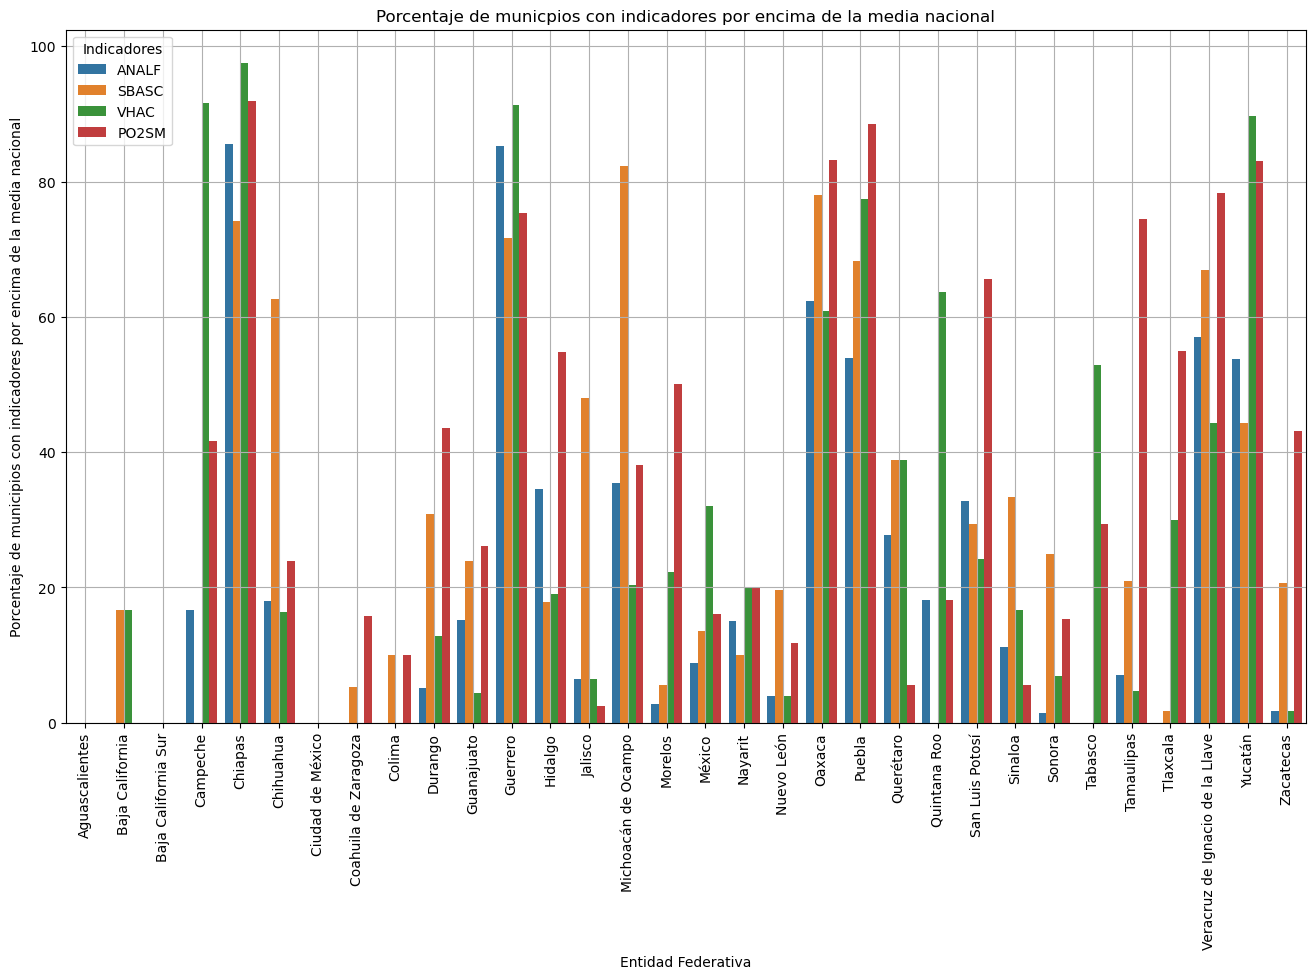

In [24]:
# Paso 3, generación del gráfico
fig5, ax5 = plt.subplots()

fig5.set_size_inches(16,9)

# Generamos nuestro gráfico de barras
# Distinguimos los colores de cada barra segun el nombre del indicador
# al transformar la DataFrame ahora se encuentran en la columna 'variable'
g5 = sns.barplot(
    x = 'NOM_ENT', 
    y = 'value',
    hue = 'variable',
    data = melted_df,
    ax = ax5)

# Agregamos información relevante y una cuadrícula para nuestro gráfico
legend_handles, _= ax.get_legend_handles_labels()
ax5.legend(legend_handles, ['ANALF','SBASC','VHAC','PO2SM'], title='Indicadores')
ax5.title.set_text('Porcentaje de municpios con indicadores por encima de la media nacional')

ax5.set_xlabel('Entidad Federativa')
ax5.set_ylabel('Porcentaje de municipios con indicadores por encima de la media nacional')
ax5.grid()

# Rotamos las etiquetas del eje x
plt.xticks(rotation=90)

plt.show()

En el gráfico anterior podemos observar como, en concordancia con los gráficos anteriores, los estados del país considerados como "más marginados" (Oaxaca, Chiapas, Guerrero, entre otros) cuentan con los mayores porcentajes de municipios cuyos indicadores se encuentran por encima de la media nacional. Sin embargo, podemos ver porcentajes considerables incluso en estados que no son considerados "marginados", por lo que no es algo exclusivo de estos estados.

--- 
Para concluir, almacenamos nuestro nuevo DataFrame en un archivo .parquet, para su facil almacenamiento e intercambio.

In [25]:
new_df_grouped.set_index("NOM_ENT").to_parquet('indicadores_estados.parquet')